# Import Libraries 

In [1]:
pip install -U scikit-learn xgboost


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale


import pickle

from sklearn import __version__ as sklearn_version
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.metrics import accuracy_score


# Show plots inline
%matplotlib inline

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

# Data Collection and Acquisition

In [4]:
# Code task 1 - Gather data
# Load CSV from a local file

df = pd.read_csv('df_features.csv')
df.head(10)

,User ID,Product ID,Product Name,Brand,Category,Price,Rating,Color,Size
0,19,1,Dress,Adidas,Men's Fashion,40,1.043159,Black,XL
1,97,2,Shoes,H&M,Women's Fashion,82,4.026416,Black,L
2,25,3,Dress,Adidas,Women's Fashion,44,3.337938,Yellow,XL
3,57,4,Shoes,Zara,Men's Fashion,23,1.049523,White,S
4,79,5,T-shirt,Adidas,Men's Fashion,79,4.302773,Black,M
5,98,6,Dress,Adidas,Men's Fashion,47,1.379566,Yellow,L
6,16,7,Jeans,Gucci,Men's Fashion,37,1.356750,White,XL
7,63,8,Sweater,Zara,Kids' Fashion,64,4.360303,Blue,XL
8,96,9,Sweater,H&M,Men's Fashion,53,4.466182,Green,XL
9,36,10,T-shirt,Zara,Kids' Fashion,55,4.093234,White,XL


In [5]:
# Show the segmented DataFrame
print(df.head())

   User ID  Product ID Product Name   Brand         Category  Price    Rating  \
0       19           1        Dress  Adidas    Men's Fashion     40  1.043159   
1       97           2        Shoes     H&M  Women's Fashion     82  4.026416   
2       25           3        Dress  Adidas  Women's Fashion     44  3.337938   
3       57           4        Shoes    Zara    Men's Fashion     23  1.049523   
4       79           5      T-shirt  Adidas    Men's Fashion     79  4.302773   

    Color Size  
0   Black   XL  
1   Black    L  
2  Yellow   XL  
3   White    S  
4   Black    M  


In [6]:
# Code task 4
# Check the format of all columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   User ID       1000 non-null   int64  
 1   Product ID    1000 non-null   int64  
 2   Product Name  1000 non-null   object 
 3   Brand         1000 non-null   object 
 4   Category      1000 non-null   object 
 5   Price         1000 non-null   int64  
 6   Rating        1000 non-null   float64
 7   Color         1000 non-null   object 
 8   Size          1000 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Feature Encoding

# Handling Non-Numeric Features (Categorical variables)

Encoding all non-numeric features such as "Product Name", "Brand", "Category", "Color", "Size" and User ID into numeric values

In [7]:
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Example dataset with multiple categorical features and a target variable 'Rating'

# Create DataFrame
df = pd.DataFrame(df)

# Features and target
X = df[['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID']]
y = df['Rating']

# Initialize CatBoostEncoder
encoder = ce.CatBoostEncoder(cols=['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID'])

# Fit and transform the training data
X_encoded = encoder.fit_transform(X, y)

# Rename the new encoded columns
X_encoded.columns = ['Product Name_encoded', 'Brand_encoded', 'Category_encoded', 'Color_encoded', 'Size_encoded', 'User ID_encoded']

# Drop the original categorical columns
df.drop(columns=['Product Name', 'Brand', 'Category', 'Color', 'Size', 'User ID'], inplace=True)

# Join the encoded features back to the original DataFrame
df_encoded = pd.concat([df, X_encoded], axis=1)


In [8]:
df_new = pd.DataFrame(df_encoded)
df_new

,Product ID,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
0,1,40,1.043159,2.993135,2.993135,2.993135,2.993135,2.993135,2.993135
1,2,82,4.026416,2.993135,2.993135,2.993135,2.018147,2.993135,2.993135
2,3,44,3.337938,2.018147,2.018147,3.509776,2.993135,2.018147,2.993135
3,4,23,1.049523,3.509776,2.993135,2.018147,2.993135,2.993135,2.993135
4,5,79,4.302773,2.993135,2.458077,1.695272,2.687570,2.993135,2.993135
...,...,...,...,...,...,...,...,...,...
995,996,55,1.620081,2.908854,3.003209,3.003089,2.925438,2.953345,2.891994
996,997,13,1.544464,3.161843,2.884686,3.038584,3.070148,3.006161,3.361617
997,998,47,3.961913,3.152329,2.996362,2.938688,3.025818,3.000314,2.623336
998,999,68,3.089722,2.954329,3.001118,2.998847,2.976151,3.025326,3.162969


Here, we have created a feature matrix where:

Product ID and Price are identifiers.
Rating is the target variable.
Rest all are the features including User ID as this feature is iterative and repeats several times in the dataset.Choosing User ID as a categorical variable will allow us to capture a group-specific patterns such as preferences, activity levels.

In [9]:
# Code task 18
# Check the shape of the new dataframe (including newly encoded columns) in the DataFrame

print(df_new.shape)

(1000, 9)


In [10]:
# Code task 19
# Check the format of all columns (including newly encoded columns) in the DataFrame

df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product ID            1000 non-null   int64  
 1   Price                 1000 non-null   int64  
 2   Rating                1000 non-null   float64
 3   Product Name_encoded  1000 non-null   float64
 4   Brand_encoded         1000 non-null   float64
 5   Category_encoded      1000 non-null   float64
 6   Color_encoded         1000 non-null   float64
 7   Size_encoded          1000 non-null   float64
 8   User ID_encoded       1000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


All columns are now numeric.

In [11]:
# Code task 20
# Check the description of all the numerical columns (including newly encoded columns) in the DataFrame

df_new.describe()

,Product ID,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,55.785000,2.993135,2.966473,2.961967,2.969352,2.965415,2.965117,2.976524
std,288.819436,26.291748,1.153185,0.217152,0.193344,0.159867,0.141875,0.136690,0.407035
min,1.000000,10.000000,1.000967,1.983693,2.018147,1.695272,1.799803,1.656591,1.701480
25%,250.750000,33.000000,1.992786,2.831600,2.854746,2.878439,2.877145,2.929529,2.721392
50%,500.500000,57.000000,2.984003,2.943164,2.930428,3.002708,2.982633,2.982184,2.993135
75%,750.250000,78.250000,3.985084,3.077073,3.106158,3.056833,3.048068,3.012145,3.228626
max,1000.000000,100.000000,4.987964,3.939873,3.828578,3.815558,3.953299,3.647954,4.266373


# Train/Test Split

Partition sizes with a 70/30 train/test split

In [12]:
len(df_new) * .7, len(df_new) * .3

(700.0, 300.0)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_new, y, test_size=0.3, 
                                                    random_state=47)

In [14]:
X_train.shape, X_test.shape

((700, 9), (300, 9))

In [15]:
y_train.shape, y_test.shape

((700,), (300,))

In [16]:
#Check the `dtypes` attribute of `X_train` to verify all features are numeric
X_train.dtypes

Product ID                int64
Price                     int64
Rating                  float64
Product Name_encoded    float64
Brand_encoded           float64
Category_encoded        float64
Color_encoded           float64
Size_encoded            float64
User ID_encoded         float64
dtype: object

In [17]:
#Repeat this check for the test split in `X_test`
X_test.dtypes

Product ID                int64
Price                     int64
Rating                  float64
Product Name_encoded    float64
Brand_encoded           float64
Category_encoded        float64
Color_encoded           float64
Size_encoded            float64
User ID_encoded         float64
dtype: object

We have only numeric features in our X now!

In [18]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product ID            1000 non-null   int64  
 1   Price                 1000 non-null   int64  
 2   Rating                1000 non-null   float64
 3   Product Name_encoded  1000 non-null   float64
 4   Brand_encoded         1000 non-null   float64
 5   Category_encoded      1000 non-null   float64
 6   Color_encoded         1000 non-null   float64
 7   Size_encoded          1000 non-null   float64
 8   User ID_encoded       1000 non-null   float64
dtypes: float64(7), int64(2)
memory usage: 70.4 KB


In [19]:
import pandas as pd
correlation_matrix = X_train.corr()
correlation_matrix

,Product ID,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
Product ID,1.000000,0.031849,0.013083,-0.023073,0.054740,0.007234,0.047833,0.031528,0.062028
Price,0.031849,1.000000,0.022195,-0.021768,-0.044327,0.052582,0.008400,0.009211,0.013732
Rating,0.013083,0.022195,1.000000,0.001814,0.005317,0.015154,-0.045281,0.012543,-0.031498
Product Name_encoded,-0.023073,-0.021768,0.001814,1.000000,0.129485,-0.047921,0.087746,0.013802,0.005867
Brand_encoded,0.054740,-0.044327,0.005317,0.129485,1.000000,-0.002885,0.145163,-0.011148,-0.014389
Category_encoded,0.007234,0.052582,0.015154,-0.047921,-0.002885,1.000000,-0.026674,0.129205,0.017597
Color_encoded,0.047833,0.008400,-0.045281,0.087746,0.145163,-0.026674,1.000000,-0.085906,-0.017502
Size_encoded,0.031528,0.009211,0.012543,0.013802,-0.011148,0.129205,-0.085906,1.000000,-0.048172
User ID_encoded,0.062028,0.013732,-0.031498,0.005867,-0.014389,0.017597,-0.017502,-0.048172,1.000000


# Method 1 - Random Forest Model

# Define the pipeline

In [20]:
#Define a pipeline comprising the steps:
#SimpleImputer() with a strategy of 'median'
#StandardScaler(),
#and then RandomForestRegressor() with a random state of 47
RF_pipe = make_pipeline(
    RandomForestRegressor(n_estimators=100, max_depth=10, random_state=47, min_samples_split=10)
)

In [21]:
X_train.head()

,Product ID,Price,Rating,Product Name_encoded,Brand_encoded,Category_encoded,Color_encoded,Size_encoded,User ID_encoded
128,129,85,2.104322,2.669062,3.059661,3.143416,2.926661,3.021098,2.993135
492,493,88,3.126248,2.807486,2.844828,2.991981,2.969442,3.011958,2.880183
303,304,85,1.300399,2.828699,2.836282,3.119169,3.084120,2.922178,3.099555
120,121,96,1.633990,2.629612,3.506794,2.750206,3.018945,2.970156,2.993135
455,456,14,4.435461,2.810580,3.213892,2.867895,2.836171,2.886689,2.341233


# Fit and assess performance using cross-validation

In [22]:
#Call `cross_validate` to estimate the pipeline's performance.
#Pass it the random forest pipe object, `X_train` and `y_train`,
#and get it to use 5-fold cross-validation
rf_default_cv_results = cross_validate(RF_pipe, X_train, y_train, cv=5, scoring='r2')


In [23]:
rf_cv_scores = rf_default_cv_results['test_score']
rf_cv_scores

array([0.99993442, 0.9999444 , 0.99992111, 0.99989516, 0.99991613])

In [24]:
np.mean(rf_cv_scores), np.std(rf_cv_scores)

(0.9999222424807789, 1.68017577727131e-05)

# Hyperparameter search using GridSearchCV

In [25]:
n_est = [100, 200, 300]
max_depth=[5, 10, 20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
grid_params = {
    'randomforestregressor__n_estimators': n_est, 
    'randomforestregressor__max_depth': max_depth,
    'randomforestregressor__min_samples_split': min_samples_split,
    'randomforestregressor__min_samples_leaf': min_samples_leaf
}
grid_params

{'randomforestregressor__n_estimators': [100, 200, 300],
 'randomforestregressor__max_depth': [5, 10, 20],
 'randomforestregressor__min_samples_split': [2, 5, 10],
 'randomforestregressor__min_samples_leaf': [1, 2, 4]}

In [26]:
#Call `GridSearchCV` with the random forest pipeline, passing in the above `grid_params`
#dict for parameters to evaluate, 5-fold cross-validation, and all available CPU cores (if desired)
rf_grid_cv = GridSearchCV(RF_pipe, param_grid=grid_params, cv=5, n_jobs=-1)

In [27]:
#Now call the `GridSearchCV`'s `fit()` method with `X_train` and `y_train` as arguments
#to actually start the grid search. This may take a minute or two.
rf_grid_cv.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(max_depth=10,
                                                              min_samples_split=10,
                                                              random_state=47))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [5, 10, 20],
                         'randomforestregressor__min_samples_leaf': [1, 2, 4],
                         'randomforestregressor__min_samples_split': [2, 5, 10],
                         'randomforestregressor__n_estimators': [100, 200,
                                                                 300]})

In [28]:
#Print the best params (`best_params_` attribute) from the grid search
rf_grid_cv.best_params_

{'randomforestregressor__max_depth': 20,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 300}

In [29]:
rf_best_cv_results = cross_validate(rf_grid_cv.best_estimator_, X_train, y_train, cv=5)
rf_best_scores = rf_best_cv_results['test_score']
rf_best_scores

array([0.99996988, 0.99997802, 0.99996608, 0.99995874, 0.99996718])

In [30]:
np.mean(rf_best_scores), np.std(rf_best_scores)

(0.9999679805838021, 6.22958988848313e-06)

There is a slight improvement in performance after performing a hyperparameter tuning as compared to has been seen from the default CV results.

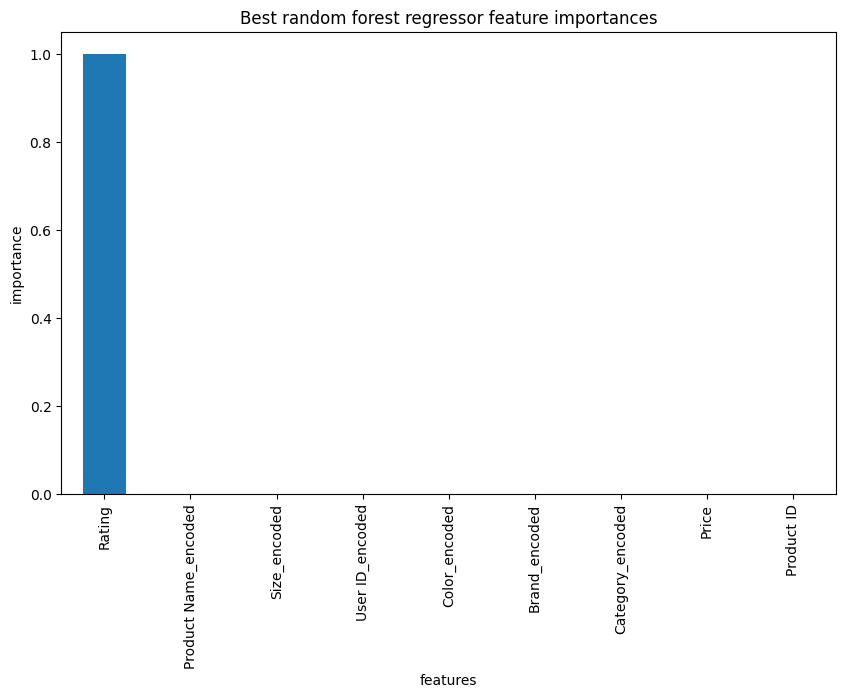

In [31]:
#Plot a barplot of the random forest's feature importances,
#assigning the `feature_importances_` attribute of 
#`rf_grid_cv.best_estimator_.named_steps.randomforestregressor` to the name `imps` to then
#create a pandas Series object of the feature importances, with the index given by the
#training data column names, sorting the values in descending order
plt.subplots(figsize=(10, 6))
imps = rf_grid_cv.best_estimator_.named_steps.randomforestregressor.feature_importances_
rf_feat_imps = pd.Series(imps, index=X_train.columns).sort_values(ascending=False)
rf_feat_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

Rating                  0.999956
Product Name_encoded    0.000007
Size_encoded            0.000006
User ID_encoded         0.000006
Color_encoded           0.000006
Brand_encoded           0.000005
Category_encoded        0.000005
Price                   0.000005
Product ID              0.000004
dtype: float64


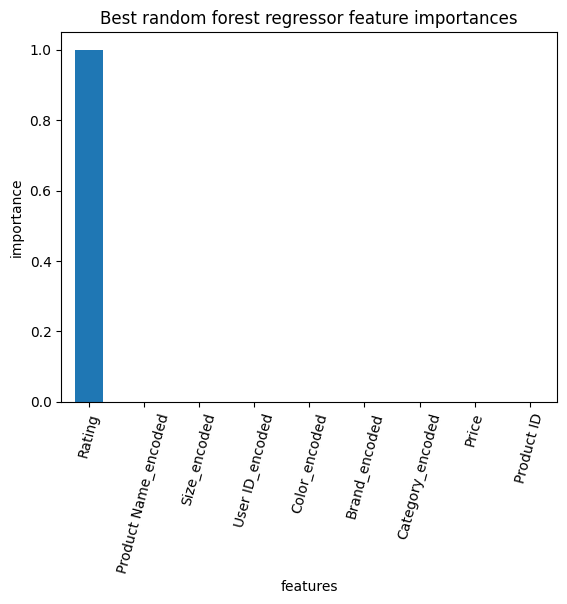

In [32]:
# Get the top N important features (e.g., top 3)
top_n = 20
top_features = rf_feat_imps.head(top_n)

# Print top N features
print(top_features)

top_features.plot(kind='bar')
plt.xticks(rotation=75)
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best random forest regressor feature importances');

A bar plot of feature importances above helps us identify following features contribute most to a model’s predictions:
Product ID, Price, User ID_24, User ID_30, User ID_83, Category_Kids Fashion, Size_M, User ID_26, User ID_76, User ID_51 are all top features.

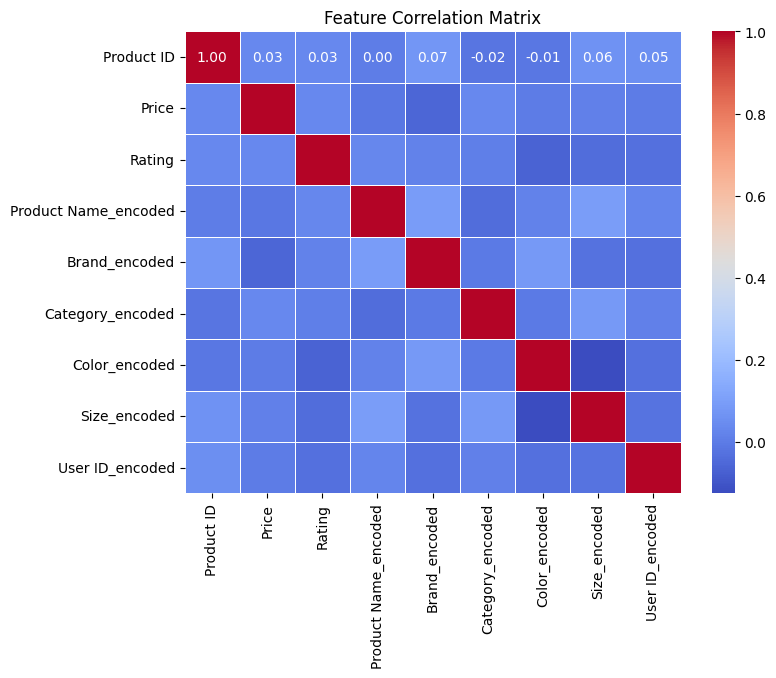

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pearson correlation matrix
corr_matrix = df_new.corr(method='pearson')

# Plotting the correlation matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

In [34]:
# Predict on the test set
y_pred = rf_grid_cv.predict(X_test)

# Display predicted ratings
print(y_pred)

[2.89267219 4.94839789 1.25833541 4.74257285 2.04294343 2.40877201
 1.450853   1.6088083  4.94770109 3.12661006 2.40854618 2.40272049
 3.93330891 2.57408504 1.37663543 1.727262   3.73829023 1.65804295
 1.84273086 2.24206271 3.70237949 1.06464206 4.65764293 4.59718504
 2.65878502 4.17504458 1.84278533 2.03925084 4.30348012 2.25959385
 4.17004215 4.35883487 3.46572125 2.59745253 3.55613083 2.05364412
 3.72704114 2.32730522 3.95935712 2.09792492 4.97646056 2.23223649
 2.00125507 3.8115158  3.26184973 4.50788552 4.3046678  2.19019873
 3.92382178 2.50331216 1.94358668 1.02664527 3.93980014 4.86944573
 1.49598435 2.14616974 1.02323362 2.19464795 3.24905876 2.92460916
 2.60519256 3.49158764 1.89451988 4.15053917 2.93847615 4.43829734
 4.50575319 1.40032958 2.58534846 1.19978405 2.39334461 1.87772523
 2.00002748 1.56915515 3.15263943 2.77406639 2.4408139  2.43161352
 4.73225035 2.5738587  3.18179938 1.17807737 1.68995782 3.66841918
 1.8395101  2.40876672 2.60608718 3.14757884 1.94405897 3.0888

In [35]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2:.2f}")


Mean Squared Error: 0.00
Mean Absolute Error: 0.00
RMSE: 0.004580684921527502
R-squared: 1.00


This is an issue, R square still not significant.

In [36]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  0.9999832737047378


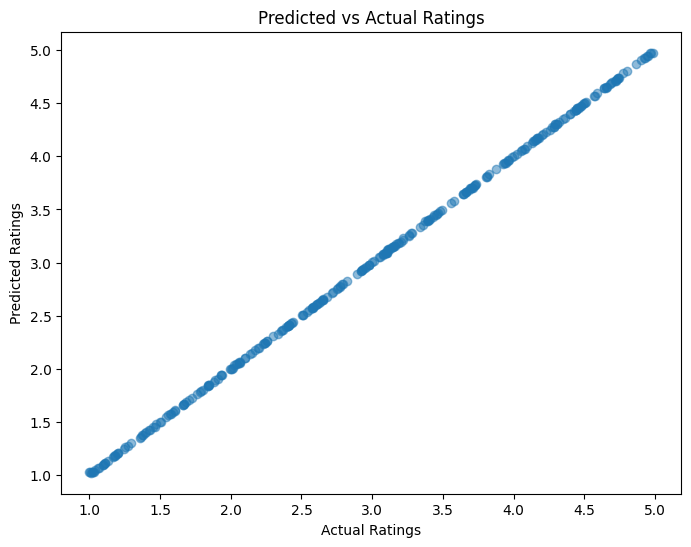

In [37]:
# Plot predicted vs actual ratings
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title("Predicted vs Actual Ratings")
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted Ratings")
plt.show()

# Analyzing Predicted Ratings Distribution

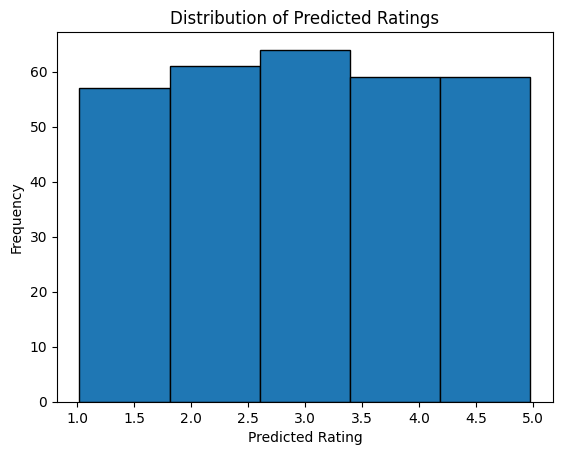

In [38]:
import matplotlib.pyplot as plt

# Simulate predicted ratings for users
predicted_ratings = y_pred

# Plot histogram of predicted ratings
plt.hist(predicted_ratings, bins=5, edgecolor='black')
plt.title("Distribution of Predicted Ratings")
plt.xlabel("Predicted Rating")
plt.ylabel("Frequency")
plt.show()

This mentions 3.0 is the most common rating and 2.5 comes second.

# Method 2 - XG BOOST MODEL

# Initialize, Build and Train the XGBoost Model

In [39]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np

# Initialize the XGBoost Regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=100, 
                             max_depth=6, 
                             learning_rate=0.1, 
                             random_state=42)

# Train the model on the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb_model.predict(X_test)

# Assess performance using RMSE, MAE, MSE

In [40]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')


Mean Absolute Error (MAE): 0.007717887810233643
R-squared: 0.999918999913102
RMSE: 0.010235519225721785
Mean Squared Error: 0.0001047658538201203


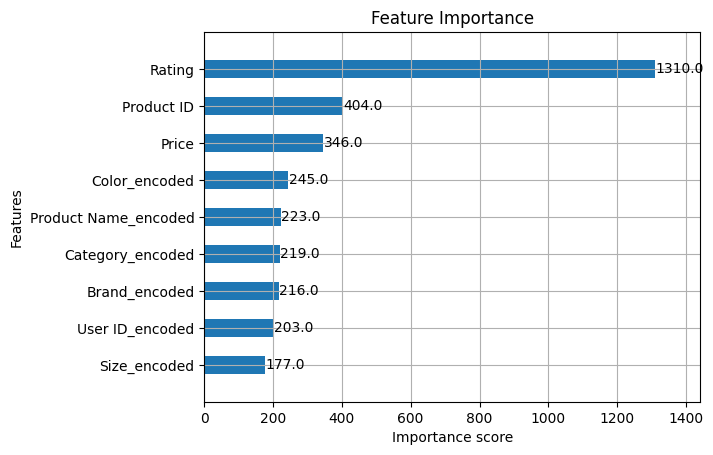

In [41]:
# Plot feature importance
xgb.plot_importance(xgb_model, importance_type='weight', max_num_features=10, height=0.5)
plt.title('Feature Importance')
plt.show()

# Hyperparameter search using GridSearchCV

In [42]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Create an instance of XGBRegressor
xgb_regressor = XGBRegressor(objective='reg:squarederror')

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', cv=3, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Negative MSE):", grid_search.best_score_)

# Use the best model to predict
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 3 folds for each of 729 candidates, totalling 2187 fits
Best Parameters: {'colsample_bytree': 1.0, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 1.0}
Best Score (Negative MSE): -0.00015006011548451893


# Method 3 - CATBOOST MODEL

Here we are predicting predicting a target like ratings (a continuous variable) based on a variety of features (both numerical and categorical) features such as Price (numerical), Product Name, User ID, Category, Size, Color, Brand (categorical).

In [43]:
import pandas as pd
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Define target and features
X = df_new.drop(columns=['Rating'])
y = df_new['Rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create CatBoost model
model_cat = CatBoostRegressor(
    iterations=1000,        # Number of boosting rounds
    depth=10,               # Depth of trees
    learning_rate=0.1,      # Learning rate,   # Loss function for regression,  # Specify which features are categorical
    verbose=200             # Output every 200 iterations
)

# Train the model
model_cat.fit(X_train, y_train)

# Make predictions
y_pred_cat = model_cat.predict(X_test)

y_pred_cat

0:	learn: 1.1152601	total: 162ms	remaining: 2m 42s
200:	learn: 0.1861083	total: 14.1s	remaining: 56.1s
400:	learn: 0.0441888	total: 28.4s	remaining: 42.4s
600:	learn: 0.0109222	total: 43s	remaining: 28.5s
800:	learn: 0.0030592	total: 57.2s	remaining: 14.2s
999:	learn: 0.0008992	total: 1m 11s	remaining: 0us


array([3.76226577, 3.75689511, 3.31644189, 2.83309826, 3.22714406,
       3.03623703, 3.72700738, 3.03071125, 3.05157215, 3.0028871 ,
       3.01271509, 3.36679207, 3.44740998, 2.9773972 , 3.47959995,
       3.46605752, 3.2978142 , 3.05505645, 3.10723225, 3.31692926,
       3.30489119, 2.57353589, 2.02473214, 3.24939622, 3.45398913,
       3.24332458, 3.37006903, 3.7295159 , 3.21600096, 2.78111919,
       2.48412921, 3.64347998, 3.06957089, 2.28788592, 3.05951118,
       2.51369041, 2.8737869 , 2.7050776 , 3.16312406, 2.37168279,
       2.13389714, 2.602183  , 3.48273882, 3.86906134, 3.7521808 ,
       3.05558573, 3.15770685, 3.20100707, 2.90980084, 2.15643951,
       3.5802092 , 3.15990498, 2.61648896, 2.74812446, 2.75437625,
       3.33049037, 2.77833598, 3.28303136, 2.03216842, 2.95735776,
       3.37163448, 2.98370602, 3.63971817, 3.34604675, 3.82138026,
       3.1213797 , 3.77459662, 2.99929712, 3.69215242, 3.06995575,
       2.49092889, 3.202981  , 2.90072527, 3.64468353, 3.26516

In [44]:
# Evaluate performance (RMSE)
rmse = mean_squared_error(y_test, y_pred_cat)
print(f"Root Mean Squared Error (RMSE): {rmse}")

Root Mean Squared Error (RMSE): 1.6037356374962248


In [45]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_cat)
print(f"R-squared: {r2}")

R-squared: -0.1276723287990027


This seems like a reasonable RMSE, even though R-square is not that significant but RMSE is pretty reasonable.

In [46]:
# Evaluate the model's performance
mae = mean_absolute_error(y_test, y_pred_cat)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_cat))
mse = mean_squared_error(y_test, y_pred_cat)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"RMSE: {rmse}")
print(f'Mean Squared Error: {mse}')

Mean Absolute Error (MAE): 1.0707432468947893
R-squared: -1.099484783636243
RMSE: 1.2663868435419823
Mean Squared Error: 1.6037356374962248


In [47]:
# Calculate Adjusted R-squared
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - ((1 - r2) * (n - 1)) / (n - k - 1)
print("Adjusted R-squared: ", adjusted_r_squared)

Adjusted R-squared:  -1.1572025783753834


In [48]:
# Get feature importance
feature_importance = model_cat.get_feature_importance()

# Create a DataFrame for easy visualization
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print the feature importance
print(importance_df)


                Feature  Importance
5         Color_encoded   15.457043
6          Size_encoded   13.483371
4      Category_encoded   13.286954
3         Brand_encoded   12.492209
2  Product Name_encoded   12.458381
1                 Price   11.477497
7       User ID_encoded   11.287574
0            Product ID   10.056971


# Visualize Feature Importance

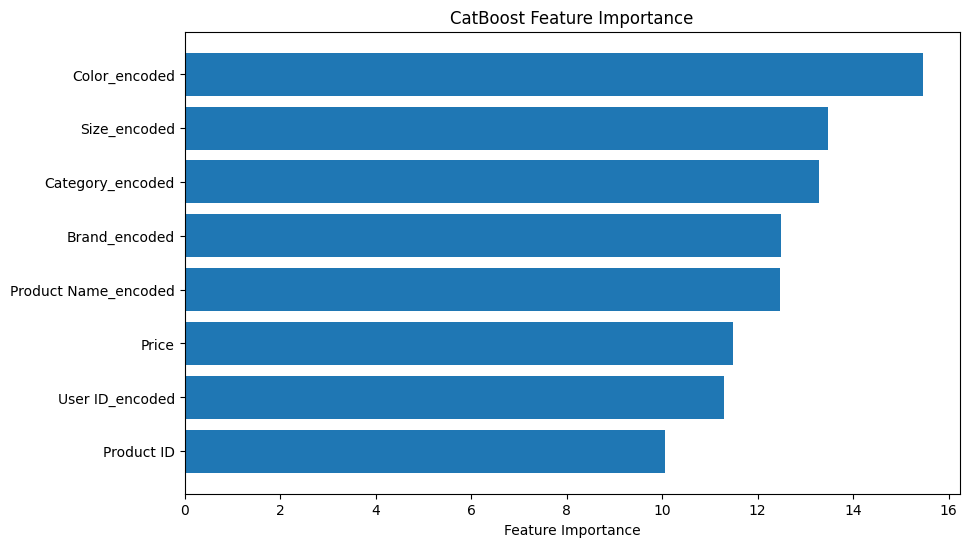

In [49]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Feature Importance')
plt.title('CatBoost Feature Importance')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

# Hyperparameter search using GridSearchCV

In [50]:
# Define the hyperparameter grid
param_grid = {
    'iterations': [500, 1000, 1500],
    'learning_rate': [0.01, 0.05, 0.1],
    'depth': [6, 8, 10],
    'l2_leaf_reg': [1, 3, 5],
    'bagging_temperature': [0.0, 0.5, 1.0],
    'od_wait': [300],
}

# Grid search
grid_search = GridSearchCV(estimator=model_cat, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and best score (RMSE)
best_params = grid_search.best_params_
best_rmse = -grid_search.best_score_  # Negate because scoring is negative RMSE
print(f"Best Hyperparameters: {best_params}")
print(f"Best RMSE: {best_rmse}")

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
0:	learn: 1.1395047	total: 108ms	remaining: 53.9s
200:	learn: 0.9904294	total: 2.75s	remaining: 4.1s
400:	learn: 0.8863627	total: 5.28s	remaining: 1.3s
499:	learn: 0.8423934	total: 6.48s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   7.0s
0:	learn: 1.1181445	total: 7.7ms	remaining: 3.84s
200:	learn: 0.6336722	total: 2.55s	remaining: 3.79s
400:	learn: 0.3849941	total: 4.91s	remaining: 1.21s
499:	learn: 0.3082911	total: 6.18s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   6.7s
0:	learn: 1.1147342	total: 3.91ms	remaining: 1.95s
200:	learn: 0.3739625	total: 2.6s	remaining: 3.87s
400:	learn: 0.1502434	total: 5.11s	remaining: 1.26s
499:	learn: 0.1010507	total: 6.35s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, 

0:	learn: 1.1230857	total: 82.8ms	remaining: 41.3s
200:	learn: 0.9768812	total: 2.63s	remaining: 3.91s
400:	learn: 0.8715318	total: 5.13s	remaining: 1.27s
499:	learn: 0.8254927	total: 6.33s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   7.0s
0:	learn: 1.1249293	total: 29.2ms	remaining: 14.6s
200:	learn: 0.6486785	total: 2.66s	remaining: 3.95s
400:	learn: 0.4166666	total: 5.14s	remaining: 1.27s
499:	learn: 0.3423534	total: 6.37s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   6.7s
0:	learn: 1.1377481	total: 18ms	remaining: 9s
200:	learn: 0.6814275	total: 2.63s	remaining: 3.91s
400:	learn: 0.4190284	total: 5.17s	remaining: 1.28s
499:	learn: 0.3348797	total: 6.42s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   6.9s
0:	learn: 1.

0:	learn: 1.1306195	total: 106ms	remaining: 52.7s
200:	learn: 0.9803932	total: 2.63s	remaining: 3.92s
400:	learn: 0.8777519	total: 5.17s	remaining: 1.28s
499:	learn: 0.8347328	total: 6.33s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   6.8s
0:	learn: 1.1437742	total: 26.8ms	remaining: 13.4s
200:	learn: 0.9951673	total: 2.51s	remaining: 3.74s
400:	learn: 0.8979863	total: 5.07s	remaining: 1.25s
499:	learn: 0.8539901	total: 6.39s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   6.8s
0:	learn: 1.1341989	total: 17.8ms	remaining: 8.9s
200:	learn: 0.6620085	total: 2.61s	remaining: 3.88s
400:	learn: 0.4213389	total: 5.17s	remaining: 1.28s
499:	learn: 0.3330789	total: 6.42s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   6.8s
0:	learn:

0:	learn: 1.1242465	total: 110ms	remaining: 54.9s
200:	learn: 0.9779940	total: 2.55s	remaining: 3.79s
400:	learn: 0.8724822	total: 4.92s	remaining: 1.21s
499:	learn: 0.8296232	total: 6.21s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=   6.8s
0:	learn: 1.1193011	total: 50.5ms	remaining: 25.2s
200:	learn: 0.6259952	total: 2.58s	remaining: 3.84s
400:	learn: 0.3660736	total: 5.03s	remaining: 1.24s
499:	learn: 0.2910584	total: 6.36s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=   7.0s
0:	learn: 1.1107791	total: 33.7ms	remaining: 16.8s
200:	learn: 0.3884925	total: 2.58s	remaining: 3.84s
400:	learn: 0.1640881	total: 5.13s	remaining: 1.26s
499:	learn: 0.1092358	total: 6.29s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=6, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=   6.7s
0:	learn:

400:	learn: 0.0427520	total: 14.7s	remaining: 3.63s
499:	learn: 0.0213969	total: 18.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  19.1s
0:	learn: 1.1304344	total: 40.6ms	remaining: 20.3s
200:	learn: 0.9313712	total: 7.69s	remaining: 11.4s
400:	learn: 0.7973529	total: 15.5s	remaining: 3.82s
499:	learn: 0.7397903	total: 19.3s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  20.0s
0:	learn: 1.1158024	total: 33.1ms	remaining: 16.5s
200:	learn: 0.5190920	total: 7.47s	remaining: 11.1s
400:	learn: 0.2622949	total: 15.1s	remaining: 3.73s
499:	learn: 0.1943184	total: 18.6s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  19.3s
0:	learn: 1.1094859	total: 65.8ms	remaining: 32.8s
200:	learn: 0.2545229	total: 7.44s	remaining: 11.1s
400:	lea

1000:	learn: 0.0602174	total: 36.1s	remaining: 18s
1200:	learn: 0.0366881	total: 43.5s	remaining: 10.8s
1400:	learn: 0.0223728	total: 50.7s	remaining: 3.58s
1499:	learn: 0.0179697	total: 54.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=1500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  56.2s
0:	learn: 1.1160944	total: 48.9ms	remaining: 1m 13s
200:	learn: 0.2766479	total: 7.49s	remaining: 48.4s
400:	learn: 0.0925411	total: 14.7s	remaining: 40.3s
600:	learn: 0.0374619	total: 21.7s	remaining: 32.5s
800:	learn: 0.0155264	total: 28.8s	remaining: 25.2s
1000:	learn: 0.0062429	total: 35.9s	remaining: 17.9s
1200:	learn: 0.0025351	total: 43s	remaining: 10.7s
1400:	learn: 0.0010462	total: 50.4s	remaining: 3.56s
1499:	learn: 0.0007115	total: 54.2s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=1500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  55.9s
0:	learn: 1.1243338	total: 36.5ms	remaining: 54.7s
200:	learn: 0.965209

499:	learn: 0.0179698	total: 18.1s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  18.9s
0:	learn: 1.1237860	total: 62.8ms	remaining: 31.4s
200:	learn: 0.9317107	total: 7.48s	remaining: 11.1s
400:	learn: 0.7932759	total: 14.9s	remaining: 3.68s
499:	learn: 0.7343606	total: 18.6s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  19.3s
0:	learn: 1.1166746	total: 39.4ms	remaining: 19.7s
200:	learn: 0.5125947	total: 8.04s	remaining: 12s
400:	learn: 0.2725998	total: 15.5s	remaining: 3.83s
499:	learn: 0.2012070	total: 19.5s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  20.0s
0:	learn: 1.1376763	total: 26.7ms	remaining: 13.3s
200:	learn: 0.5589686	total: 7.56s	remaining: 11.2s
400:	learn: 0.3077100	total: 15.2s	remaining: 3.75s
499:	learn

400:	learn: 0.7923309	total: 14.9s	remaining: 3.69s
499:	learn: 0.7337675	total: 18.5s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  19.1s
0:	learn: 1.1437686	total: 30.9ms	remaining: 15.4s
200:	learn: 0.9467474	total: 7.72s	remaining: 11.5s
400:	learn: 0.8140703	total: 15.3s	remaining: 3.79s
499:	learn: 0.7591766	total: 19.2s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  19.8s
0:	learn: 1.1332839	total: 39.4ms	remaining: 19.7s
200:	learn: 0.5503522	total: 7.76s	remaining: 11.5s
400:	learn: 0.3111013	total: 15.3s	remaining: 3.77s
499:	learn: 0.2391201	total: 19.1s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=8, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  19.5s
0:	learn: 1.1160944	total: 50.6ms	remaining: 25.3s
200:	learn: 0.2766479	total: 7.56s	remaining: 11.3s
400:	le

[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  54.8s
0:	learn: 1.1241933	total: 175ms	remaining: 1m 27s
200:	learn: 0.9074716	total: 21.9s	remaining: 32.6s
400:	learn: 0.7481509	total: 43.3s	remaining: 10.7s
499:	learn: 0.6842164	total: 53.9s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  54.5s
0:	learn: 1.1170112	total: 135ms	remaining: 1m 7s
200:	learn: 0.4413947	total: 22s	remaining: 32.7s
400:	learn: 0.2252027	total: 44.4s	remaining: 11s
499:	learn: 0.1572472	total: 54.8s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  55.6s
0:	learn: 1.1382607	total: 112ms	remaining: 56s
200:	learn: 0.4930977	total: 21.3s	remaining: 31.6s
400:	learn: 0.2502799	total: 44.2s	remaining: 10.9s
499:	learn: 0.1776415	total: 54.8s	remaining: 0us
[CV] END bagg

[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  54.4s
0:	learn: 1.1185740	total: 105ms	remaining: 52.5s
200:	learn: 0.1594620	total: 21s	remaining: 31.3s
400:	learn: 0.0324408	total: 42.3s	remaining: 10.4s
499:	learn: 0.0137039	total: 52.9s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  53.7s
0:	learn: 1.1305717	total: 55.6ms	remaining: 27.8s
200:	learn: 0.9057173	total: 22s	remaining: 32.7s
400:	learn: 0.7451660	total: 43.3s	remaining: 10.7s
499:	learn: 0.6789353	total: 54s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  54.6s
0:	learn: 1.1177928	total: 129ms	remaining: 1m 4s
200:	learn: 0.4512606	total: 21.9s	remaining: 32.6s
400:	learn: 0.2261863	total: 41.9s	remaining: 10.4s
499:	learn: 0.1604935	total: 52.4s	remaining: 0us
[CV] END bagg

499:	learn: 0.0134904	total: 53.3s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  54.1s
0:	learn: 1.1260080	total: 99ms	remaining: 49.4s
200:	learn: 0.1590260	total: 21.7s	remaining: 32.3s
400:	learn: 0.0284139	total: 43s	remaining: 10.6s
499:	learn: 0.0144274	total: 53.5s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  54.3s
0:	learn: 1.1392000	total: 140ms	remaining: 1m 10s
200:	learn: 0.9205503	total: 22.3s	remaining: 33.2s
400:	learn: 0.7612604	total: 43.7s	remaining: 10.8s
499:	learn: 0.6954504	total: 54.6s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  55.1s
0:	learn: 1.1246253	total: 75.3ms	remaining: 37.6s
200:	learn: 0.4553053	total: 22.1s	remaining: 32.9s
400:	learn: 0.2453355	total: 42.8s	remaining: 10.6s
499:	learn

400:	learn: 0.0331500	total: 42.4s	remaining: 10.5s
499:	learn: 0.0158985	total: 52.7s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  53.2s
0:	learn: 1.1226359	total: 108ms	remaining: 54s
200:	learn: 0.9039994	total: 21.2s	remaining: 31.5s
400:	learn: 0.7426044	total: 43.1s	remaining: 10.6s
499:	learn: 0.6766627	total: 53.9s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  54.8s
0:	learn: 1.1438933	total: 143ms	remaining: 1m 11s
200:	learn: 0.9202705	total: 22.1s	remaining: 32.9s
400:	learn: 0.7663653	total: 44s	remaining: 10.9s
499:	learn: 0.7046008	total: 54.4s	remaining: 0us
[CV] END bagging_temperature=0.0, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  55.1s
0:	learn: 1.1326083	total: 100ms	remaining: 50.1s
200:	learn: 0.4652796	total: 22s	remaining: 32.7s
400:	learn: 0

400:	learn: 0.5174382	total: 7.54s	remaining: 1.86s
499:	learn: 0.4470047	total: 9.34s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=   9.9s
0:	learn: 1.1168206	total: 52.1ms	remaining: 26s
200:	learn: 0.4672785	total: 3.73s	remaining: 5.55s
400:	learn: 0.2237012	total: 7.39s	remaining: 1.82s
499:	learn: 0.1640540	total: 9.31s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=   9.9s
0:	learn: 1.1303359	total: 4.04ms	remaining: 2.02s
200:	learn: 0.4932887	total: 3.41s	remaining: 5.07s
400:	learn: 0.2513200	total: 7.22s	remaining: 1.78s
499:	learn: 0.1853853	total: 8.94s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=   9.6s
0:	learn: 1.1247807	total: 3.93ms	remaining: 1.96s
200:	learn: 1.0159593	total: 3.56s	remaining: 5.29s
400:	learn:

499:	learn: 0.4358771	total: 9.3s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=   9.9s
0:	learn: 1.1213406	total: 21.1ms	remaining: 10.5s
200:	learn: 0.5119683	total: 3.6s	remaining: 5.36s
400:	learn: 0.2594163	total: 7.32s	remaining: 1.81s
499:	learn: 0.1896231	total: 8.93s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=   9.7s
0:	learn: 1.1234255	total: 5.92ms	remaining: 2.96s
200:	learn: 1.0158560	total: 3.71s	remaining: 5.52s
400:	learn: 0.9343004	total: 7.33s	remaining: 1.81s
499:	learn: 0.8971235	total: 9.09s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=   9.6s
0:	learn: 1.1399332	total: 42ms	remaining: 21s
200:	learn: 1.0325501	total: 3.52s	remaining: 5.24s
400:	learn: 0.9556731	total: 7.37s	remaining: 1.82s
499:	learn: 0.

0:	learn: 1.1227614	total: 3.73ms	remaining: 1.86s
200:	learn: 0.5505174	total: 3.47s	remaining: 5.16s
400:	learn: 0.3278677	total: 7.08s	remaining: 1.75s
499:	learn: 0.2486532	total: 8.94s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=   9.4s
0:	learn: 1.1242465	total: 31ms	remaining: 31s
200:	learn: 0.9779940	total: 3.52s	remaining: 14s
400:	learn: 0.8724822	total: 7s	remaining: 10.5s
600:	learn: 0.7862840	total: 10.6s	remaining: 7.03s
800:	learn: 0.7032015	total: 14.3s	remaining: 3.54s
999:	learn: 0.6292753	total: 17.7s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  18.6s
0:	learn: 1.1181445	total: 27ms	remaining: 27s
200:	learn: 0.6336722	total: 3.71s	remaining: 14.7s
400:	learn: 0.3849941	total: 7.31s	remaining: 10.9s
600:	learn: 0.2415290	total: 11.1s	remaining: 7.38s
800:	learn: 0.1567732	total: 14.5s	remai

[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  18.7s
0:	learn: 1.1203762	total: 33.6ms	remaining: 33.6s
200:	learn: 0.6975666	total: 3.62s	remaining: 14.4s
400:	learn: 0.4572372	total: 7.22s	remaining: 10.8s
600:	learn: 0.3176006	total: 11s	remaining: 7.29s
800:	learn: 0.2287804	total: 14.8s	remaining: 3.68s
999:	learn: 0.1714279	total: 18.2s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  19.5s
0:	learn: 1.1393479	total: 3.55ms	remaining: 3.55s
200:	learn: 0.7451302	total: 3.56s	remaining: 14.2s
400:	learn: 0.5212724	total: 6.95s	remaining: 10.4s
600:	learn: 0.3697399	total: 10.2s	remaining: 6.79s
800:	learn: 0.2646274	total: 13.7s	remaining: 3.42s
999:	learn: 0.1920549	total: 17.2s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  18.4s
0:	

[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  21.4s
0:	learn: 1.1180934	total: 45.2ms	remaining: 22.6s
200:	learn: 0.5653200	total: 8.6s	remaining: 12.8s
400:	learn: 0.3364077	total: 17s	remaining: 4.2s
499:	learn: 0.2628574	total: 21.5s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  22.2s
0:	learn: 1.1122672	total: 74.8ms	remaining: 37.3s
200:	learn: 0.3552881	total: 8.6s	remaining: 12.8s
400:	learn: 0.1475927	total: 16.7s	remaining: 4.12s
499:	learn: 0.1029174	total: 20.8s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  21.6s
0:	learn: 1.1334644	total: 46.8ms	remaining: 23.4s
200:	learn: 0.3938105	total: 8.45s	remaining: 12.6s
400:	learn: 0.1559824	total: 16.5s	remaining: 4.06s
499:	learn: 0.1069268	total: 20.5s	remaining: 0us
[CV] END bagg

[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  21.2s
0:	learn: 1.1254643	total: 28.7ms	remaining: 14.3s
200:	learn: 0.6017919	total: 8.34s	remaining: 12.4s
400:	learn: 0.3825121	total: 16.8s	remaining: 4.14s
499:	learn: 0.3147878	total: 21.1s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  21.9s
0:	learn: 1.1113122	total: 64.7ms	remaining: 32.3s
200:	learn: 0.3435185	total: 8.18s	remaining: 12.2s
400:	learn: 0.1352853	total: 16.6s	remaining: 4.1s
499:	learn: 0.0855327	total: 20.9s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  21.8s
0:	learn: 1.1219999	total: 44.2ms	remaining: 44.2s
200:	learn: 0.8706095	total: 8.34s	remaining: 33.2s
400:	learn: 0.7004589	total: 16.8s	remaining: 25.1s
600:	learn: 0.5697858	total: 25.1s	remaining: 16.7s
800:	le

200:	learn: 0.3860473	total: 8.28s	remaining: 32.9s
400:	learn: 0.1608759	total: 16.5s	remaining: 24.7s
600:	learn: 0.0725534	total: 25.3s	remaining: 16.8s
800:	learn: 0.0340993	total: 34s	remaining: 8.45s
999:	learn: 0.0155625	total: 42.2s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  43.3s
0:	learn: 1.1041200	total: 37.6ms	remaining: 37.6s
200:	learn: 0.1640535	total: 8.57s	remaining: 34.1s
400:	learn: 0.0354950	total: 16.4s	remaining: 24.4s
600:	learn: 0.0089628	total: 24.6s	remaining: 16.4s
800:	learn: 0.0023541	total: 33.2s	remaining: 8.24s
999:	learn: 0.0006711	total: 41.6s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  42.8s
0:	learn: 1.1236864	total: 38ms	remaining: 37.9s
200:	learn: 0.1825677	total: 8.32s	remaining: 33.1s
400:	learn: 0.0359196	total: 16.8s	remaining: 25.1s
600:	learn: 0.0084616	total: 

0:	learn: 1.1302145	total: 45.1ms	remaining: 45.1s
200:	learn: 0.3082147	total: 7.39s	remaining: 29.4s
400:	learn: 0.0871502	total: 14.6s	remaining: 21.8s
600:	learn: 0.0310432	total: 22s	remaining: 14.6s
800:	learn: 0.0125905	total: 29.3s	remaining: 7.28s
999:	learn: 0.0052130	total: 36.5s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  37.7s
0:	learn: 1.1396842	total: 29.6ms	remaining: 29.6s
200:	learn: 0.9786526	total: 7.82s	remaining: 31.1s
400:	learn: 0.8609224	total: 14.7s	remaining: 22s
600:	learn: 0.7652334	total: 21.8s	remaining: 14.4s
800:	learn: 0.6919222	total: 28.9s	remaining: 7.18s
999:	learn: 0.6326484	total: 35.8s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=8, iterations=1000, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  37.1s
0:	learn: 1.1254643	total: 36.7ms	remaining: 36.7s
200:	learn: 0.6017919	total: 7.75s	remaining: 30.8s
400:	learn: 0.3825121	total: 1

[CV] END bagging_temperature=0.5, depth=10, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  53.1s
0:	learn: 1.1371822	total: 81.2ms	remaining: 1m 21s
200:	learn: 0.7525171	total: 21.9s	remaining: 1m 27s
400:	learn: 0.5236587	total: 43.5s	remaining: 1m 4s
600:	learn: 0.3747072	total: 1m 5s	remaining: 43.2s
800:	learn: 0.2790956	total: 1m 26s	remaining: 21.4s
999:	learn: 0.2151642	total: 1m 47s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time= 1.8min
0:	learn: 1.1178643	total: 96.8ms	remaining: 1m 36s
200:	learn: 0.2211797	total: 21.9s	remaining: 1m 26s
400:	learn: 0.0595270	total: 43.1s	remaining: 1m 4s
600:	learn: 0.0165706	total: 1m 4s	remaining: 42.9s
800:	learn: 0.0052941	total: 1m 25s	remaining: 21.3s
999:	learn: 0.0017849	total: 1m 46s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=

999:	learn: 0.0000101	total: 1m 45s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time= 1.8min
0:	learn: 1.1386024	total: 73.6ms	remaining: 1m 13s
200:	learn: 0.8679634	total: 21.5s	remaining: 1m 25s
400:	learn: 0.6769238	total: 43.2s	remaining: 1m 4s
600:	learn: 0.5409172	total: 1m 4s	remaining: 42.9s
800:	learn: 0.4405342	total: 1m 25s	remaining: 21.4s
999:	learn: 0.3663463	total: 1m 47s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time= 1.8min
0:	learn: 1.1222619	total: 109ms	remaining: 1m 48s
200:	learn: 0.3631894	total: 23s	remaining: 1m 31s
400:	learn: 0.1628872	total: 44.8s	remaining: 1m 6s
600:	learn: 0.0740484	total: 1m 6s	remaining: 44.5s
800:	learn: 0.0338601	total: 1m 29s	remaining: 22.4s
999:	learn: 0.0163939	total: 1m 53s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_re

800:	learn: 0.2602711	total: 1m 25s	remaining: 21.1s
999:	learn: 0.1946733	total: 1m 46s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time= 1.8min
0:	learn: 1.1084585	total: 117ms	remaining: 1m 56s
200:	learn: 0.1897931	total: 21.6s	remaining: 1m 25s
400:	learn: 0.0483385	total: 42.8s	remaining: 1m 3s
600:	learn: 0.0154010	total: 1m 3s	remaining: 42.3s
800:	learn: 0.0048043	total: 1m 24s	remaining: 21s
999:	learn: 0.0016884	total: 1m 45s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time= 1.8min
0:	learn: 1.1290566	total: 129ms	remaining: 2m 9s
200:	learn: 0.2198971	total: 21.6s	remaining: 1m 26s
400:	learn: 0.0567950	total: 42.8s	remaining: 1m 3s
600:	learn: 0.0158893	total: 1m 4s	remaining: 42.6s
800:	learn: 0.0043714	total: 1m 25s	remaining: 21.3s
999:	learn: 0.0012694	total: 1m 47s	remaining: 0us
[CV] END bagging_te

800:	learn: 0.0616333	total: 1m 32s	remaining: 23.1s
999:	learn: 0.0346475	total: 1m 55s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time= 1.9min
0:	learn: 1.1100514	total: 79.8ms	remaining: 1m 19s
200:	learn: 0.2159473	total: 24.1s	remaining: 1m 35s
400:	learn: 0.0637193	total: 47.8s	remaining: 1m 11s
600:	learn: 0.0208791	total: 1m 12s	remaining: 48.3s
800:	learn: 0.0069577	total: 1m 36s	remaining: 23.9s
999:	learn: 0.0024970	total: 1m 59s	remaining: 0us
[CV] END bagging_temperature=0.5, depth=10, iterations=1000, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time= 2.0min
0:	learn: 1.1312848	total: 90.2ms	remaining: 1m 30s
200:	learn: 0.2457902	total: 23.9s	remaining: 1m 35s
400:	learn: 0.0640511	total: 47.8s	remaining: 1m 11s
600:	learn: 0.0201858	total: 1m 11s	remaining: 47.6s
800:	learn: 0.0060599	total: 1m 34s	remaining: 23.6s
999:	learn: 0.0021879	total: 1m 58s	remaining: 0us
[CV] END ba

200:	learn: 0.5505174	total: 3.59s	remaining: 5.35s
400:	learn: 0.3278677	total: 8.03s	remaining: 1.98s
499:	learn: 0.2486532	total: 9.79s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=500, l2_leaf_reg=5, learning_rate=0.1, od_wait=300; total time=  10.5s
0:	learn: 1.1242465	total: 3.69ms	remaining: 3.68s
200:	learn: 0.9779940	total: 3.86s	remaining: 15.4s
400:	learn: 0.8724822	total: 7.8s	remaining: 11.7s
600:	learn: 0.7862840	total: 11.2s	remaining: 7.41s
800:	learn: 0.7032015	total: 15s	remaining: 3.72s
999:	learn: 0.6292753	total: 18.5s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  19.9s
0:	learn: 1.1437742	total: 4.08ms	remaining: 4.08s
200:	learn: 0.9951673	total: 3.81s	remaining: 15.2s
400:	learn: 0.8979863	total: 8.01s	remaining: 12s
600:	learn: 0.8144952	total: 11.8s	remaining: 7.82s
800:	learn: 0.7420623	total: 15.5s	remaining: 3.86s
999:	learn: 0.6760791	total: 18

0:	learn: 1.1147342	total: 61.1ms	remaining: 1m 1s
200:	learn: 0.3739625	total: 4.01s	remaining: 15.9s
400:	learn: 0.1502434	total: 7.75s	remaining: 11.6s
600:	learn: 0.0691753	total: 11.2s	remaining: 7.46s
800:	learn: 0.0340672	total: 15.2s	remaining: 3.78s
999:	learn: 0.0168730	total: 19.2s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  20.5s
0:	learn: 1.1304689	total: 30ms	remaining: 29.9s
200:	learn: 0.4119225	total: 4.27s	remaining: 17s
400:	learn: 0.1703357	total: 7.83s	remaining: 11.7s
600:	learn: 0.0724693	total: 11.9s	remaining: 7.88s
800:	learn: 0.0344702	total: 15.9s	remaining: 3.94s
999:	learn: 0.0162286	total: 20s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=1, learning_rate=0.1, od_wait=300; total time=  21.3s
0:	learn: 1.1397732	total: 16.3ms	remaining: 16.3s
200:	learn: 1.0164362	total: 4.1s	remaining: 16.3s
400:	learn: 0.9292058	total: 7.55s

[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=3, learning_rate=0.1, od_wait=300; total time=  20.5s
0:	learn: 1.1399332	total: 4.16ms	remaining: 4.15s
200:	learn: 1.0325501	total: 3.86s	remaining: 15.3s
400:	learn: 0.9556731	total: 7.76s	remaining: 11.6s
600:	learn: 0.8905269	total: 11.7s	remaining: 7.74s
800:	learn: 0.8349088	total: 15.3s	remaining: 3.8s
999:	learn: 0.7857584	total: 19.2s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=5, learning_rate=0.01, od_wait=300; total time=  20.1s
0:	learn: 1.1273428	total: 4.61ms	remaining: 4.6s
200:	learn: 0.7730701	total: 4.32s	remaining: 17.2s
400:	learn: 0.5668116	total: 8.32s	remaining: 12.4s
600:	learn: 0.4406785	total: 12s	remaining: 7.97s
800:	learn: 0.3424495	total: 15.5s	remaining: 3.85s
999:	learn: 0.2631644	total: 19.5s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1000, l2_leaf_reg=5, learning_rate=0.05, od_wait=300; total time=  20.8s
0:	lea

[CV] END bagging_temperature=1.0, depth=6, iterations=1500, l2_leaf_reg=1, learning_rate=0.01, od_wait=300; total time=  29.5s
0:	learn: 1.1181445	total: 3.66ms	remaining: 5.48s
200:	learn: 0.6336722	total: 3.76s	remaining: 24.3s
400:	learn: 0.3849941	total: 7.66s	remaining: 21s
600:	learn: 0.2415290	total: 11.2s	remaining: 16.8s
800:	learn: 0.1567732	total: 15.5s	remaining: 13.5s
1000:	learn: 0.1021616	total: 19.1s	remaining: 9.5s
1200:	learn: 0.0692006	total: 22.8s	remaining: 5.68s
1400:	learn: 0.0474542	total: 26.9s	remaining: 1.9s
1499:	learn: 0.0389273	total: 28.8s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=6, iterations=1500, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  30.3s
0:	learn: 1.1147342	total: 3.67ms	remaining: 5.5s
200:	learn: 0.3739625	total: 3.88s	remaining: 25.1s
400:	learn: 0.1502434	total: 7.46s	remaining: 20.4s
600:	learn: 0.0691753	total: 11s	remaining: 16.5s
800:	learn: 0.0340672	total: 15.1s	remaining: 13.2s
1000:	learn: 0.0168229	to

999:	learn: 0.0190137	total: 50.2s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  51.8s
0:	learn: 1.1343361	total: 56.9ms	remaining: 56.8s
200:	learn: 0.4227466	total: 10s	remaining: 39.9s
400:	learn: 0.1814519	total: 20s	remaining: 29.9s
600:	learn: 0.0815323	total: 30.2s	remaining: 20.1s
800:	learn: 0.0376699	total: 40.5s	remaining: 10.1s
999:	learn: 0.0182102	total: 50.5s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=1, learning_rate=0.05, od_wait=300; total time=  52.0s
0:	learn: 1.1185580	total: 57ms	remaining: 56.9s
200:	learn: 0.1776741	total: 10.5s	remaining: 41.7s
400:	learn: 0.0427520	total: 20.2s	remaining: 30.1s
600:	learn: 0.0103626	total: 30.3s	remaining: 20.1s
800:	learn: 0.0026414	total: 40.4s	remaining: 10s
999:	learn: 0.0007038	total: 50.9s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=1, learning_ra

800:	learn: 0.6181169	total: 40.8s	remaining: 10.1s
999:	learn: 0.5492666	total: 50.9s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.01, od_wait=300; total time=  52.6s
0:	learn: 1.1239781	total: 84.7ms	remaining: 1m 24s
200:	learn: 0.5308649	total: 10.7s	remaining: 42.4s
400:	learn: 0.3146920	total: 20.4s	remaining: 30.4s
600:	learn: 0.1758849	total: 30.4s	remaining: 20.2s
800:	learn: 0.0975585	total: 40.4s	remaining: 10s
999:	learn: 0.0596784	total: 50.4s	remaining: 0us
[CV] END bagging_temperature=1.0, depth=8, iterations=1000, l2_leaf_reg=3, learning_rate=0.05, od_wait=300; total time=  52.3s
0:	learn: 1.1059955	total: 64.7ms	remaining: 1m 4s
200:	learn: 0.2875241	total: 10.2s	remaining: 40.4s
400:	learn: 0.0956098	total: 20.2s	remaining: 30.2s
600:	learn: 0.0328601	total: 30.3s	remaining: 20.1s
800:	learn: 0.0113641	total: 40.5s	remaining: 10.1s
999:	learn: 0.0041454	total: 50.5s	remaining: 0us
[CV] END bagging_temperatur

0:	learn: 1.1326852	total: 31ms	remaining: 15.5s
200:	learn: 0.9818360	total: 8.01s	remaining: 11.9s
400:	learn: 0.8752631	total: 15.8s	remaining: 3.9s
499:	learn: 0.8283726	total: 19.7s	remaining: 0us
Best Hyperparameters: {'bagging_temperature': 0.0, 'depth': 8, 'iterations': 500, 'l2_leaf_reg': 5, 'learning_rate': 0.01, 'od_wait': 300}
Best RMSE: 0.013291565171690412


Best RMSE: 0.013

We first Sort out the predicted ratings for each user in descending order and then Select the top N products with the highest predicted ratings.

This gives us the Top-N recommended products for each user based on the predicted ratings.

In [61]:
# Assuming `y_pred` are the predicted ratings and `X_test` contains the user-product pairs
X_test['Predicted Rating'] = y_pred_cat

# Define how many top recommendations per user you want
N = 5  # You can change this value to 5, 10, or any other number

# Sort by user ID and predicted rating to get top N recommendations
top_n_recommendations = X_test.sort_values(by=['User ID_encoded', 'Predicted Rating'], ascending=[True, False])

# For each user, get top N recommendations (e.g., top 3)
top_n_recommendations = top_n_recommendations.groupby('User ID_encoded').head(N)

print(top_n_recommendations[['User ID_encoded', 'Product ID', 'Predicted Rating']])

     User ID_encoded  Product ID  Predicted Rating
514         1.746142         515          3.348521
355         1.844024         356          3.425922
231         1.987245         232          3.472032
96          2.004066          97          2.602183
306         2.018041         307          2.751387
..               ...         ...               ...
78          3.870652          79          2.085317
208         3.958035         209          3.185424
239         3.970400         240          1.993726
346         3.976196         347          2.484129
589         4.049862         590          3.273464

[288 rows x 3 columns]


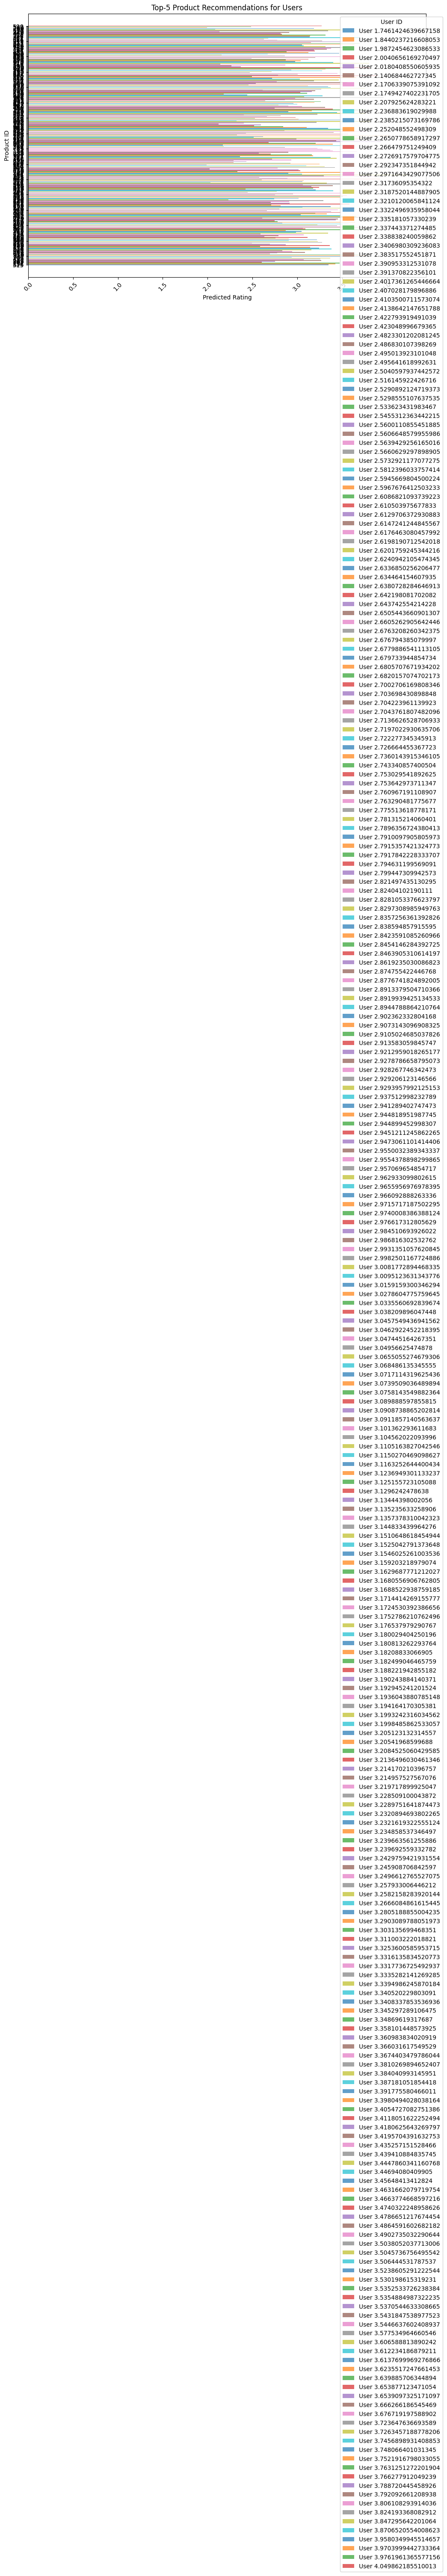

In [62]:
# Plot Top-N Recommendations for each user
plt.figure(figsize=(12, 8))  # Adjusted figure size for top N recommendations

# Iterate over each unique user
for user_id in top_n_recommendations['User ID_encoded'].unique():
    user_recommendations = top_n_recommendations[top_n_recommendations['User ID_encoded'] == user_id]
    
    # Plot the top N products for this user
    plt.barh(user_recommendations['Product ID'].astype(str), 
             user_recommendations['Predicted Rating'], 
             label=f'User {user_id}', alpha=0.7)

plt.xlabel('Predicted Rating')
plt.ylabel('Product ID')
plt.title(f'Top-{N} Product Recommendations for Users')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.legend(title='User ID', loc='upper right', bbox_to_anchor=(1.05, 1))
plt.tight_layout()  # Adjusts the layout to prevent overlap with the legend
plt.show()



# Content-based Filtering

In [59]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

# Prepare product features for content-based filtering
product_features = df_new[['Price'] + [col for col in df_new.columns if 'Product_Name' in col or 'Brand' in col]]

# Standardize continuous features (like price)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(product_features)

# Calculate the cosine similarity matrix
cosine_sim = cosine_similarity(scaled_features)

# Example: Recommend products similar to product 101 (Red T-Shirt)
def get_similar_products(product_id, top_n=5):
    idx = df_new[df_new['Product ID'] == product_id].index[0]
    similarity_scores = list(enumerate(cosine_sim[idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    
    # Get top N most similar products
    top_similar_products = [df_new['Product ID'][i[0]] for i in similarity_scores[1:top_n + 1]]
    return df_new[df_new['Product ID'].isin(top_similar_products)]

similar_products = get_similar_products(101)

print(similar_products[['Product ID', 'Price', 'Rating']])

     Product ID  Price    Rating
243         244     85  3.474622
481         482     97  3.578219
573         574     92  4.491894
628         629     95  3.579320
635         636     96  4.602211


In [70]:
# Collaborative recommendations for user (using SVD)
collaborative_recommendations = recommended_products[['Product ID', 'Price', 'Rating']]

# Content-based recommendations for a product (using cosine similarity)
content_based_recommendations = get_similar_products(1)

# Combine both recommendation lists
hybrid_recommendations = pd.concat([collaborative_recommendations, content_based_recommendations[['Product ID', 'Price', 'Rating']]])
print("Hybrid Recommendations (Collaborative + Content-Based):")
print(hybrid_recommendations.drop_duplicates())

Hybrid Recommendations (Collaborative + Content-Based):
     Product ID  Price    Rating
125         126     55  4.851704
160         161     67  4.735472
468         469     95  4.906296
780         781     85  4.828403
701         702     58  4.794782
166         167     43  4.478061
601         602     11  4.342864
667         668     11  1.842279
731         732     28  2.645059
907         908     36  3.194487


In [71]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE for collaborative filtering (SVD)
rmse = np.sqrt(mean_squared_error(user_item_matrix.values, reconstructed_matrix))

print(f"RMSE for Collaborative Filtering (SVD): {rmse}")

RMSE for Collaborative Filtering (SVD): 0.09928869210242441


The RMSE value of 0.099 for SVD-based Collaborative Filtering model suggests that the model is performing well.

# Segmenting the users into spending group

Segmenting users into high-spending or low-spending group can be used in data analysis and marketing strategy. By doing this, we can personalize marketing efforts, improve customer experience, and optimize business strategies. Here's I segment users based on these a key dimension — spending as how many users purchase the most products.

High-Spending: Users whose total spending or average purchase amount is above a threshold, 70.

Low-Spending: Users whose total spending or average purchase amount is below a certain threshold, which is 70.

In [72]:
# craete a new dataframe

df_seg = pd.DataFrame(df)

In [73]:
# Ensure 'Price' is always treated as an iterable (even if it's a single integer)

def handle_purchase_prices(Price):
    # since it's not a list or iterable, we will first make it a list
    if isinstance(Price, int):
        return [Price]
    return Price

In [74]:
# Apply the function to ensure 'purchase_prices' is a list

df_seg['Price'] = df_seg['Price'].apply(handle_purchase_prices)

In [75]:
# Feature: Total Purchase Amount (Total amount spent by the user)
df_seg['total_purchase_amount'] = df_seg['Price'].apply(lambda x: sum(x))


In [76]:
# Set thresholds for segmentation
spending_threshold = 70  # High spending if total_purchase_amount > 70

In [77]:
# Create new segmentation columns
df_seg['spending_segment'] = np.where(df_seg['total_purchase_amount'] > spending_threshold, 'High Spending', 'Low Spending')

In [78]:
df_seg = df_seg.drop(columns = ["Price"])

In [79]:
df_seg.head()

,Product ID,Rating,total_purchase_amount,spending_segment
0,1,1.043159,40,Low Spending
1,2,4.026416,82,High Spending
2,3,3.337938,44,Low Spending
3,4,1.049523,23,Low Spending
4,5,4.302773,79,High Spending


# Segment-wise Analysis

# Compute Average Rating per Spending Segment

Calculating the average rating for each spending segment (e.g., Low Spending, High Spending) to see if there's a noticeable difference between them.

In [85]:
# Assuming 'data' is your dataframe containing 'spending_segment' and 'ratings'

# Group by spending segment and calculate the mean of ratings
average_ratings_by_segment = df_seg.groupby('spending_segment')['Rating'].mean()

print("Average Ratings by Spending Segment:")
print(average_ratings_by_segment)

Average Ratings by Spending Segment:
spending_segment
High Spending    3.035180
Low Spending     2.970891
Name: Rating, dtype: float64


There is somewhat difference between high spenders rating vs low spender rating. High spenders tends to rate products slightly more positively than low spenders.

# Visualize the Distribution of Ratings for Each Segment

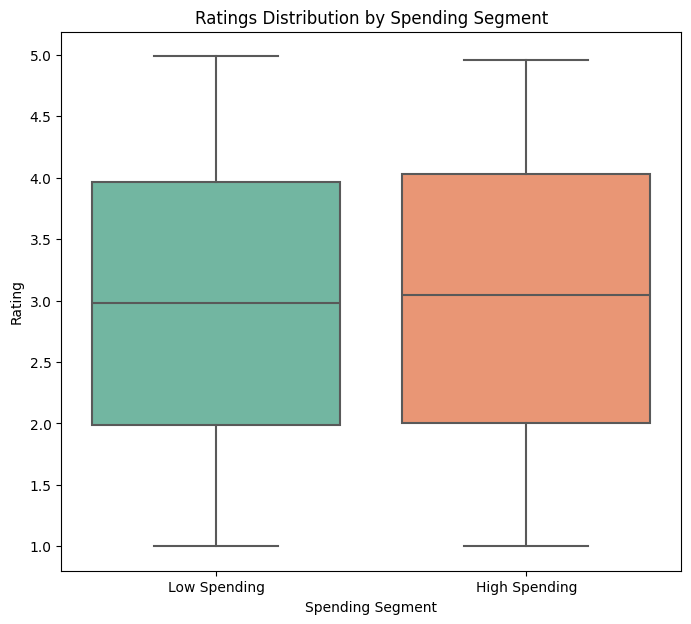

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to compare ratings between spending segments
plt.figure(figsize=(8, 7))
sns.boxplot(x='spending_segment', y='Rating', data=df_seg, palette="Set2")
plt.title('Ratings Distribution by Spending Segment')
plt.xlabel('Spending Segment')
plt.ylabel('Rating')
plt.show()

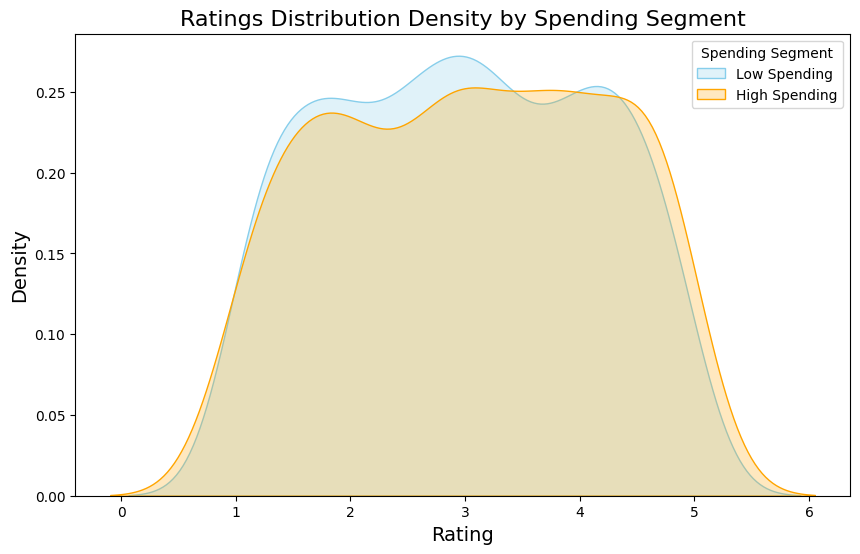

In [87]:
# Create KDE plot to show the density of ratings for each spending segment
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'Low Spending']['Rating'], label='Low Spending', shade=True, color='skyblue')
sns.kdeplot(data=df_seg[df_seg['spending_segment'] == 'High Spending']['Rating'], label='High Spending', shade=True, color='orange')

# Add more segments if applicable
# sns.kdeplot(data[data['Spending Segment'] == 'Medium Spending']['rating'], label='Medium Spending', shade=True, color='green')

# Title and labels
plt.title('Ratings Distribution Density by Spending Segment', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Show the legend and plot
plt.legend(title='Spending Segment')
plt.show()


# Summary:

CatBoost, a gradient boosting framework works well with our training set beacuse of the presence of high number of categorical features and is also effective in predicting a continuous outcome (rating).